In [14]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import time
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import transforms
import importlib
import roofnet.utils.data as roof
import TripletLoss

In [15]:
data_dir = "C:\\Users\\Simas\\Desktop\\RoofNet"

# Initialize Model

In [16]:
# Size of latent space
latent_space = 128

# Number of epochs to train for
num_epochs = 1

In [17]:
model = TripletLoss.Model(input_shape=255, latent_space = latent_space, dropout = 0.1)

# Initialize Data

In [18]:
data_file_path = data_dir + "\\train_hard.npy"
data = roof.ImageDataset(data_file_path, 
                    transform=transforms.Compose([
                                transforms.ToPILImage(mode='RGB'),
                                transforms.ColorJitter(0.5,0.5,0.5,0),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #Resnet Normalization
                            ]))

val_data_file_path = data_dir + "\\test_easy.npy"
val_data = roof.ImageDataset(val_data_file_path, 
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #Resnet Normalization
                            ]))

Loading data
Done loading data
Length 2765
Num Roofs 395
Loading data
Done loading data
Length 210
Num Roofs 30


In [19]:
BATCH_SIZE = 16
NUM_BATCHES = 200
VAL_BATCHES = 100

sampler = roof.TripletBuildingSampler(data,batch_size=BATCH_SIZE*NUM_BATCHES)
loader = torch.utils.data.DataLoader(data, sampler=sampler,batch_size=BATCH_SIZE*3)

val_sampler = roof.TripletBuildingSampler(val_data,batch_size=BATCH_SIZE*VAL_BATCHES)
val_loader = torch.utils.data.DataLoader(val_data, sampler=val_sampler,batch_size=BATCH_SIZE*3)

In [18]:
hist, train_loss, score = model.train_model(loader, val_loader, 0.0, num_epochs)

Epoch 0/0
----------
train Loss: 2.1735 Acc: 0.5994
val Loss: 1.3361 Acc: 0.7412

Training complete in 4m 18s
Best val Acc: 0.741250


In [20]:
model.load('Hard Train 0_5_10 Margin Easy Val Dropout Jitter')

In [21]:
latents = model.get_latents(val_data)

In [38]:
hold = []
for i in latents[3].reshape(7,-1):
    hold.append(np.linalg.norm(i))
hold

[7.2767982, 6.5707016, 8.415574, 5.9844785, 5.9211054, 6.5408087, 10.367697]

In [40]:
diff = []
n = 3
for i in range(6):
    diff.append(np.linalg.norm(latents[n].reshape(7,-1)[i]-latents[n].reshape(7,-1)[i+1]))
diff

[5.766388, 5.6709, 5.5932274, 4.807089, 3.6888504, 9.906287]

In [26]:
data_array = TripletLoss.make_data_array(val_data)

In [36]:
data_array[3]['meta'][0]['transition_year']

2016

In [42]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=4)
pca.fit(latents[3].reshape(7,-1))  

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
print(pca.explained_variance_ratio_) 

[0.50913084 0.18126094 0.1299291  0.07201277]


In [45]:
print(pca.singular_values_) 

[8.1376295 4.8555155]


In [47]:
latents[3].reshape(7,-1).shape

(7, 128)

In [60]:
temp = pca.transform(latents[3].reshape(7,-1))
temp_x = temp[:,0]
temp_y = temp[:,1]

In [55]:
temp_x

array([-1.9721566 , -0.61318207,  0.05797387, -1.7529069 , -0.67843467,
       -2.3229837 ,  7.281689  ], dtype=float32)

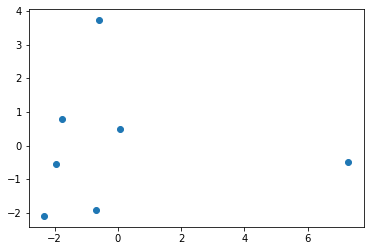

In [61]:
plt.scatter(temp_x,temp_y)

In [57]:
temp_x

array([-1.9721566 , -0.61318207,  0.05797387, -1.7529069 , -0.67843467,
       -2.3229837 ,  7.281689  ], dtype=float32)

In [62]:
all_data = []
for i in latents:
    all_data.extend(i.reshape(7,-1))
all_data= np.array(all_data)

In [63]:
all_data.shape

(210, 128)

In [67]:
pca = PCA(n_components=2)

In [68]:
temp = pca.fit_transform(all_data)

In [69]:
temp_x = temp[:,0]
temp_y = temp[:,1]

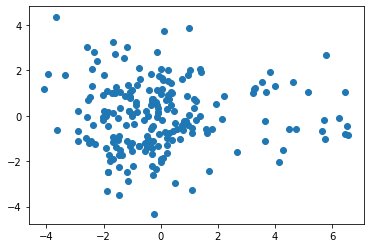

In [70]:
plt.scatter(temp_x,temp_y)

In [82]:
pca = PCA(n_components=42)
pca.fit_transform(all_data)
print(sum(pca.explained_variance_ratio_)) 

0.9007235448807478
